In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import geojson

In [3]:
df = pd.read_excel('who_aap_2021_v9_11august2022.xlsx', 'AAP_2022_city_v9')
city = pd.read_csv('worldcities.csv')

Do analizy zostały wykorzystane rekordy powyżej 90% pokrycia czasowego ze względu na kompleksowość zestawu danych oraz możliwośc przedstawienia dokładniejszej analizy oraz uwzględnia wszystkie pory roku oraz warunki pogodowe.

In [4]:
df25 = df[df['PM25 temporal coverage (%)']>90]
df10 = df[df['PM10 temporal coverage (%)']>90]
dfno2 = df[df['NO2 temporal coverage (%)']>90]
df25.loc[:, 'PM2.5 (μg/m3)'] = df25['PM2.5 (μg/m3)'].interpolate(method='spline', order=3)
df10.loc[:, 'PM10 (μg/m3)'] = df10['PM10 (μg/m3)'].interpolate(method='spline', order=3)
dfno2.loc[:, 'NO2 (μg/m3)'] = dfno2['NO2 (μg/m3)'].interpolate(method='spline', order=3)

Została pobrana ramka danych w celu wyznaczenia długości oraz szerokości geograficznej dla miast zawartych w ramce danych. Dzięki temu mogły powstać ramki danych w celu pokazania jak wyglądają wartości zanieczyszczeń w poszczególnych miastach na mapie świata.

In [5]:
merged_pm25 = pd.merge(left=city, right=df25, left_on='city_ascii', right_on='City or Locality').sort_values('Measurement Year', ascending=True)
merged_pm10 = pd.merge(left=city, right=df10, left_on='city_ascii', right_on='City or Locality').sort_values('Measurement Year', ascending=True)
merged_no2 = pd.merge(left=city, right=dfno2, left_on='city_ascii', right_on='City or Locality').sort_values('Measurement Year', ascending=True)

Zostały stworzone ramki danych na poziomie regionu WHO, kraju oraz miasta w celu ukazania ich na mapie

In [6]:
reg25 = df25.groupby(['Measurement Year', 'WHO Region','ISO3'], as_index=False)[['PM2.5 (μg/m3)']].mean()
reg252 = df25.groupby(['Measurement Year', 'WHO Region'], as_index=False)[['PM2.5 (μg/m3)']].mean()
reg25 =pd.merge(left=reg25, right=reg252, left_on='WHO Region', right_on='WHO Region')

reg10 = df10.groupby(['Measurement Year', 'WHO Region','ISO3'], as_index=False)[['PM10 (μg/m3)']].mean()
reg102 = df10.groupby(['Measurement Year', 'WHO Region'], as_index=False)[['PM10 (μg/m3)']].mean()
reg10 =pd.merge(left=reg10, right=reg102, left_on='WHO Region', right_on='WHO Region')

regno = dfno2.groupby(['Measurement Year', 'WHO Region','ISO3'], as_index=False)[['NO2 (μg/m3)']].mean()
regno2 = dfno2.groupby(['Measurement Year', 'WHO Region'], as_index=False)[['NO2 (μg/m3)']].mean()
regno2 =pd.merge(left=regno, right=regno2, left_on='WHO Region', right_on='WHO Region')

con25 = df25.groupby(['Measurement Year', 'WHO Country Name','ISO3'], as_index=False)[['PM2.5 (μg/m3)']].mean()
con10 = df10.groupby(['Measurement Year','WHO Country Name', 'ISO3'], as_index=False)[['PM10 (μg/m3)']].mean()
conno2 = dfno2.groupby(['Measurement Year', 'WHO Country Name' ,'ISO3'], as_index=False)[['NO2 (μg/m3)']].mean()

W celu ukazania danych na wykresach ramka-wąsy oraz histogramach zostały stworzone ramki danych dla każdego typu zanieczyszczenia.

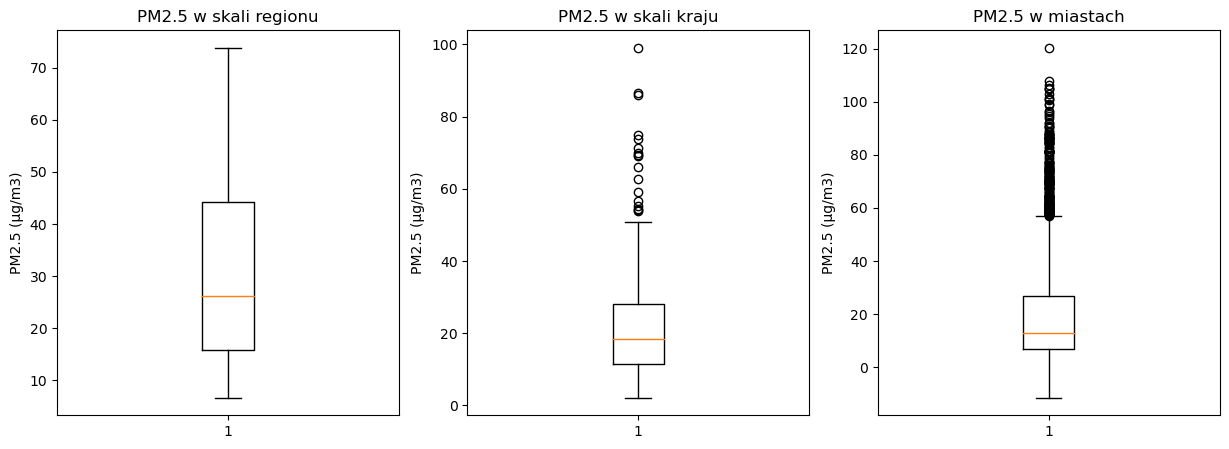

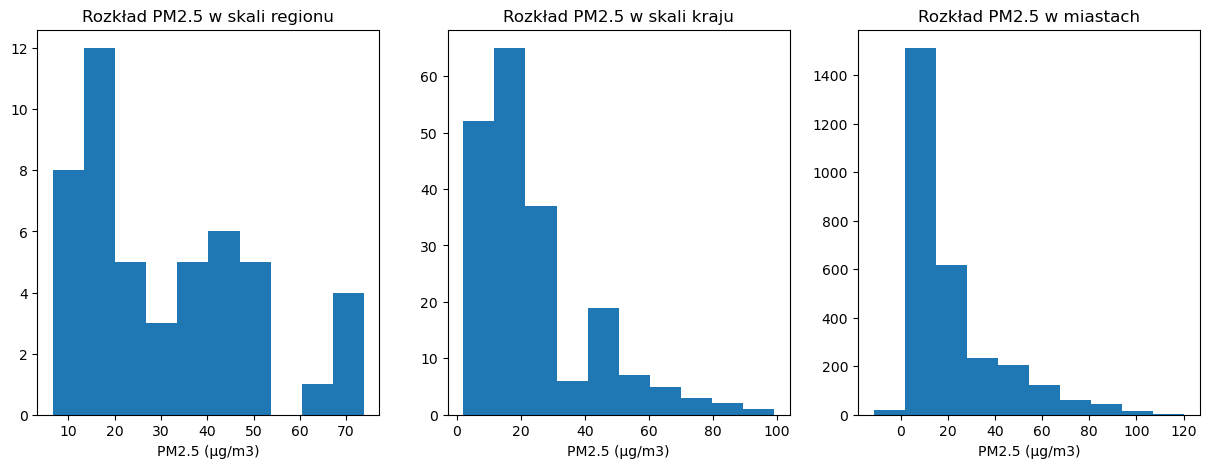

In [7]:
reg25h = df25.groupby(['Measurement Year', 'WHO Region'])[['PM2.5 (μg/m3)']].mean()
con25h = df25.groupby(['Measurement Year', 'WHO Country Name'])[['PM2.5 (μg/m3)']].mean()
cit25h = merged_pm25
fig, axs = plt.subplots(1, 3, figsize=(15, 5))


axs[0].boxplot(reg25h['PM2.5 (μg/m3)'])
axs[0].set_title('PM2.5 w skali regionu')
axs[0].set_ylabel('PM2.5 (μg/m3)')

axs[1].boxplot(con25h['PM2.5 (μg/m3)'])
axs[1].set_title('PM2.5 w skali kraju')
axs[1].set_ylabel('PM2.5 (μg/m3)')

axs[2].boxplot(cit25h['PM2.5 (μg/m3)'])
axs[2].set_title('PM2.5 w miastach')
axs[2].set_ylabel('PM2.5 (μg/m3)')

plt.show()

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].hist(reg25h['PM2.5 (μg/m3)'])
axs[0].set_title('Rozkład PM2.5 w skali regionu')
axs[0].set_xlabel('PM2.5 (μg/m3)')

axs[1].hist(con25h['PM2.5 (μg/m3)'])
axs[1].set_title('Rozkład PM2.5 w skali kraju')
axs[1].set_xlabel('PM2.5 (μg/m3)')

axs[2].hist(cit25h['PM2.5 (μg/m3)'])
axs[2].set_title('Rozkład PM2.5 w miastach')
axs[2].set_xlabel('PM2.5 (μg/m3)')

plt.show()

W przypadku pyłów zawieszonych PM2.5 wraz ze zmniejszeniem poziomu generalizacji zwiększa się liczba wartości odstających na wykresie ramka wąsy, natomiast w przypadku histogramów, ich symetria przesuwa się w lewą stronę.

In [17]:
fig = px.choropleth(reg25,locations='ISO3',color='PM2.5 (μg/m3)_y' ,hover_name = 'WHO Region', color_continuous_scale=px.colors.diverging.RdYlGn_r,
                    animation_frame='Measurement Year_y', title='Uśrednione wartości zanieczyszczenia PM2.5 w skali regionu')

fig.show()

In [9]:
fig = px.choropleth(con25, locations='ISO3', color='PM2.5 (μg/m3)', hover_name='WHO Country Name', color_continuous_scale=px.colors.diverging.RdYlGn_r,
                    animation_frame='Measurement Year',
                    title='Uśrednione wartości zanieczyszczenia PM2.5 w skali kraju')
fig.show()

In [10]:
fig = px.scatter_geo(merged_pm25,
                    lat='lat',
                    lon='lng',
                    hover_name="city",
                    color='PM2.5 (μg/m3)', color_continuous_scale=px.colors.diverging.RdYlGn_r, animation_frame='Measurement Year',
                    title='Wartości zanieczyszczenia PM2.5 w wybranych miastach')
fig.show()

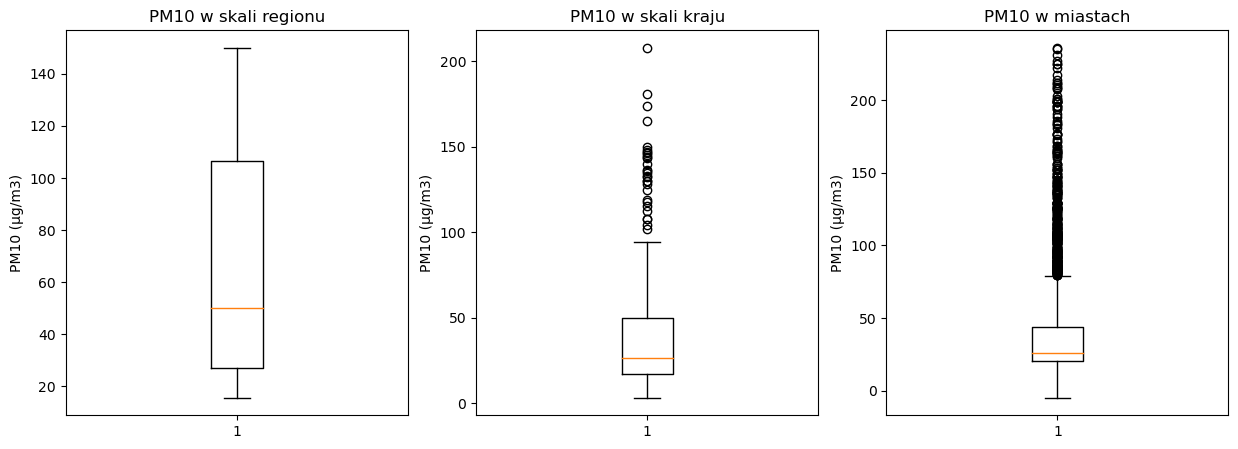

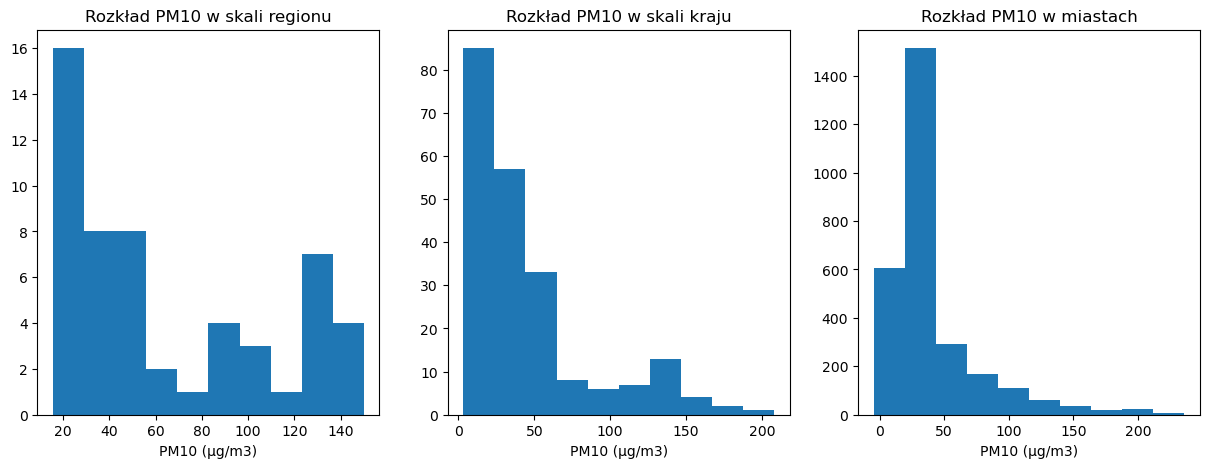

In [98]:
reg10h = df10.groupby(['Measurement Year', 'WHO Region'])[['PM10 (μg/m3)']].mean()
con10h = df10.groupby(['Measurement Year', 'WHO Country Name'])[['PM10 (μg/m3)']].mean()
cit10h = merged_pm10
fig, axs = plt.subplots(1, 3, figsize=(15, 5))


axs[0].boxplot(reg10h['PM10 (μg/m3)'])
axs[0].set_title('PM10 w skali regionu')
axs[0].set_ylabel('PM10 (μg/m3)')

axs[1].boxplot(con10h['PM10 (μg/m3)'])
axs[1].set_title('PM10 w skali kraju')
axs[1].set_ylabel('PM10 (μg/m3)')

axs[2].boxplot(cit10h['PM10 (μg/m3)'])
axs[2].set_title('PM10 w miastach')
axs[2].set_ylabel('PM10 (μg/m3)')

plt.show()

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].hist(reg10h['PM10 (μg/m3)'])
axs[0].set_title('Rozkład PM10 w skali regionu')
axs[0].set_xlabel('PM10 (μg/m3)')

axs[1].hist(con10h['PM10 (μg/m3)'])
axs[1].set_title('Rozkład PM10 w skali kraju')
axs[1].set_xlabel('PM10 (μg/m3)')

axs[2].hist(cit10h['PM10 (μg/m3)'])
axs[2].set_title('Rozkład PM10 w miastach')
axs[2].set_xlabel('PM10 (μg/m3)')

plt.show()

In [11]:
fig = px.choropleth(reg10, locations='ISO3', color='PM10 (μg/m3)_y', hover_name='WHO Region', color_continuous_scale=px.colors.diverging.RdYlGn_r,
                    animation_frame='Measurement Year_y',
                    title='Uśrednione wartości zanieczyszczenia PM10 w skali regionu WHO')
fig.show()

In [12]:
fig = px.choropleth(con10, locations='ISO3', color='PM10 (μg/m3)', hover_name='WHO Country Name', color_continuous_scale=px.colors.diverging.RdYlGn_r,
                    animation_frame='Measurement Year',
                    title='Uśrednione wartości zanieczyszczenia PM10 w skali kraju')
fig.show()

In [13]:
fig = px.scatter_geo(merged_pm10,
                    lat='lat',
                    lon='lng',
                    hover_name="city",
                    color='PM10 (μg/m3)', color_continuous_scale=px.colors.diverging.RdYlGn_r,
                     animation_frame='Measurement Year',
                    title='Wartości zanieczyszczenia PM10 w wybranych miastach')
fig.show()

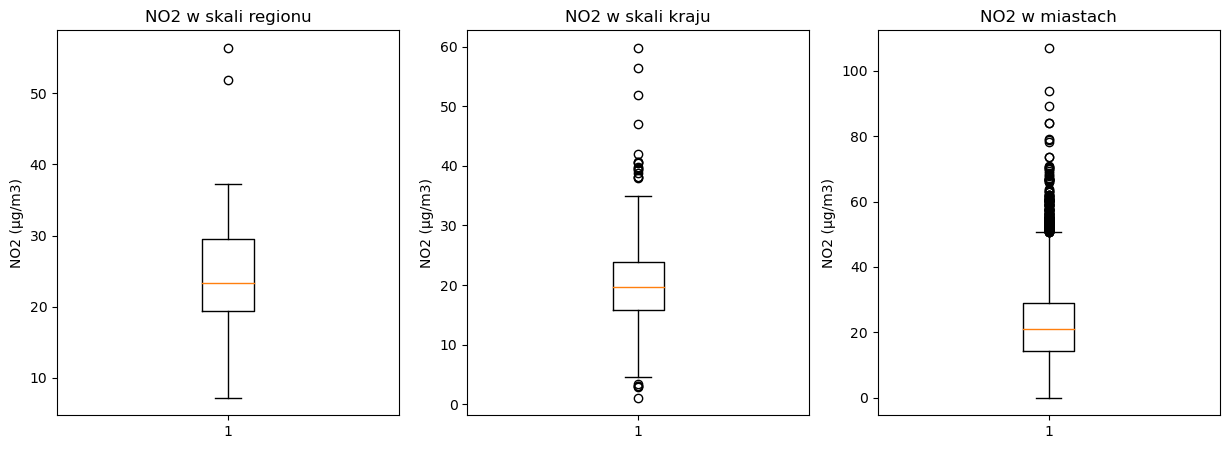

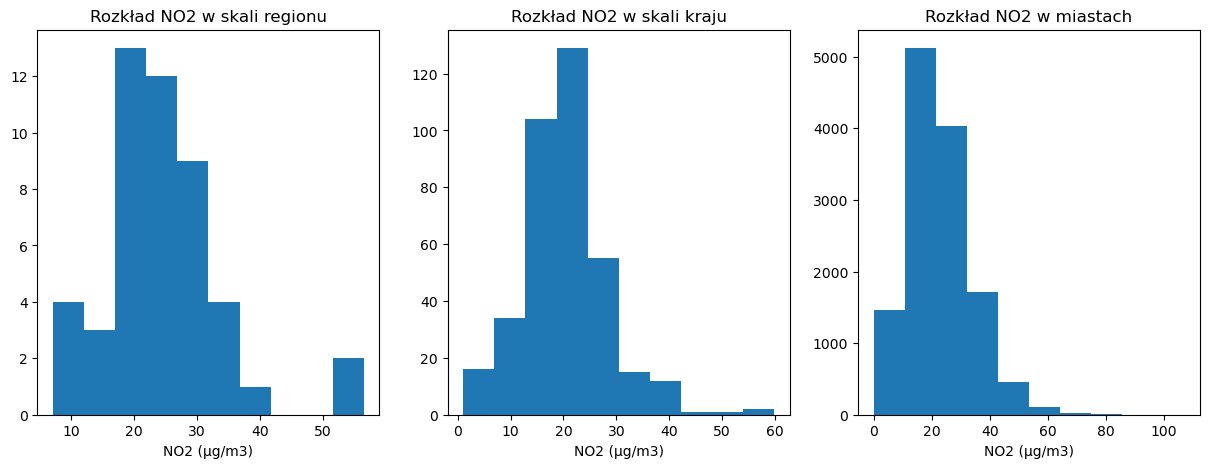

In [99]:
regno2h = dfno2.groupby(['Measurement Year', 'WHO Region'])[['NO2 (μg/m3)']].mean()
conno2h = dfno2.groupby(['Measurement Year', 'WHO Country Name'])[['NO2 (μg/m3)']].mean()
citno2h = merged_no2
fig, axs = plt.subplots(1, 3, figsize=(15, 5))


axs[0].boxplot(regno2h['NO2 (μg/m3)'])
axs[0].set_title('NO2 w skali regionu')
axs[0].set_ylabel('NO2 (μg/m3)')

axs[1].boxplot(conno2h['NO2 (μg/m3)'])
axs[1].set_title('NO2 w skali kraju')
axs[1].set_ylabel('NO2 (μg/m3)')

axs[2].boxplot(citno2h['NO2 (μg/m3)'])
axs[2].set_title('NO2 w miastach')
axs[2].set_ylabel('NO2 (μg/m3)')

plt.show()

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].hist(regno2h['NO2 (μg/m3)'])
axs[0].set_title('Rozkład NO2 w skali regionu')
axs[0].set_xlabel('NO2 (μg/m3)')

axs[1].hist(conno2h['NO2 (μg/m3)'])
axs[1].set_title('Rozkład NO2 w skali kraju')
axs[1].set_xlabel('NO2 (μg/m3)')

axs[2].hist(citno2h['NO2 (μg/m3)'])
axs[2].set_title('Rozkład NO2 w miastach')
axs[2].set_xlabel('NO2 (μg/m3)')

plt.show()

In [14]:
fig = px.choropleth(regno2, locations='ISO3', color='NO2 (μg/m3)_y', hover_name='WHO Region', color_continuous_scale=px.colors.diverging.RdYlGn_r,
                    animation_frame='Measurement Year_y',
                    title='Uśrednione wartości zanieczyszczenia NO2 w skali regionu')
fig.show()

In [15]:
fig = px.choropleth(conno2, locations='ISO3', color='NO2 (μg/m3)', hover_name='WHO Country Name', color_continuous_scale=px.colors.diverging.RdYlGn_r,
                    animation_frame='Measurement Year',
                    title='Uśrednione wartości zanieczyszczenia NO2 w skali kraju')
fig.show()

In [16]:
fig = px.scatter_geo(merged_no2,
                    lat='lat',
                    lon='lng',
                    hover_name="city",
                    color='NO2 (μg/m3)', color_continuous_scale=px.colors.diverging.RdYlGn_r, animation_frame='Measurement Year',
                    title='Wartości zanieczyszczenia NO2 w wybranych miastach')
fig.show()


W przypadku każdego z rodzajów zanieczyszczenia powietrza zmniejszenie poziomu generalizacji pozwala na dokładniejszą analizę w punktach zainteresowania oraz łatwiejszą identyfikację czynników na to oddziałujących.

Największe pomiary zanieczyszczeń odnotowane zostały w najbardziej zurbanizowanych oraz zaludnionych obszarach. Największe średnie pomiary w skali kraju zanotowano w Chinach, które charakteryzują się najwyższą ludnością na świecie oraz znajdują się tam największe aglomeracje. W przypadku tych danych, do wykorzystania w uczeniu maszynowym problemem są duże braki w danych oraz krótki okres pomiarowy. Jednakże, dane te mogą posłużyć jako zbiór testowy do oceny jakości modelu.